Note: Chat GPT 4.0 helped in code generation for this Assignment

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

Visualising Google Stock

In [2]:
# Load the dataset
data = pd.read_csv('C:\\Users\\luigi\\Desktop\\Third Year\\Fintech\\Stock Visualisation Engine\\Dataset\\Microsoft_Dataset.csv')
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

data

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,26.25,27.00,26.10,26.84,79974418,MSFT
1,2006-01-04,26.77,27.08,26.77,26.97,57975661,MSFT
2,2006-01-05,26.96,27.13,26.91,26.99,48247610,MSFT
3,2006-01-06,26.89,27.00,26.49,26.91,100969092,MSFT
4,2006-01-09,26.93,27.07,26.76,26.86,55627836,MSFT
...,...,...,...,...,...,...,...
3014,2017-12-22,85.40,85.63,84.92,85.51,14145841,MSFT
3015,2017-12-26,85.31,85.53,85.03,85.40,9891237,MSFT
3016,2017-12-27,85.65,85.98,85.22,85.71,14678025,MSFT
3017,2017-12-28,85.90,85.93,85.55,85.72,10594344,MSFT


Plotting Original Close Prices

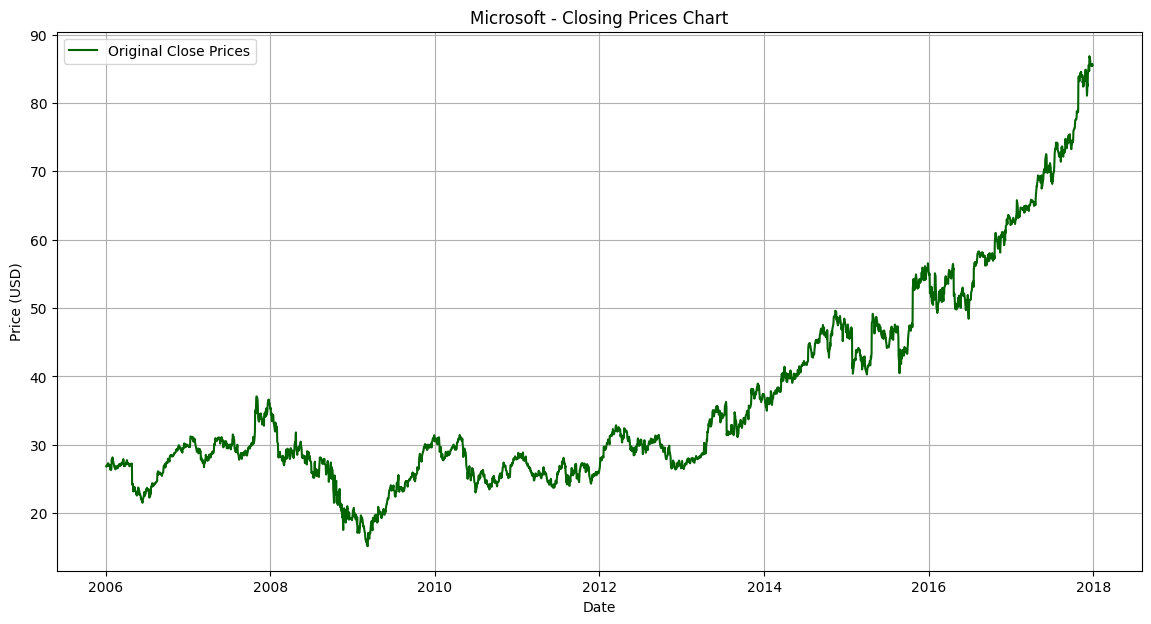

In [3]:
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Original Close Prices', color='darkgreen')
plt.title('Microsoft - Closing Prices Chart')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

Plotting Smoothed Close Prices (30-Day SMA)

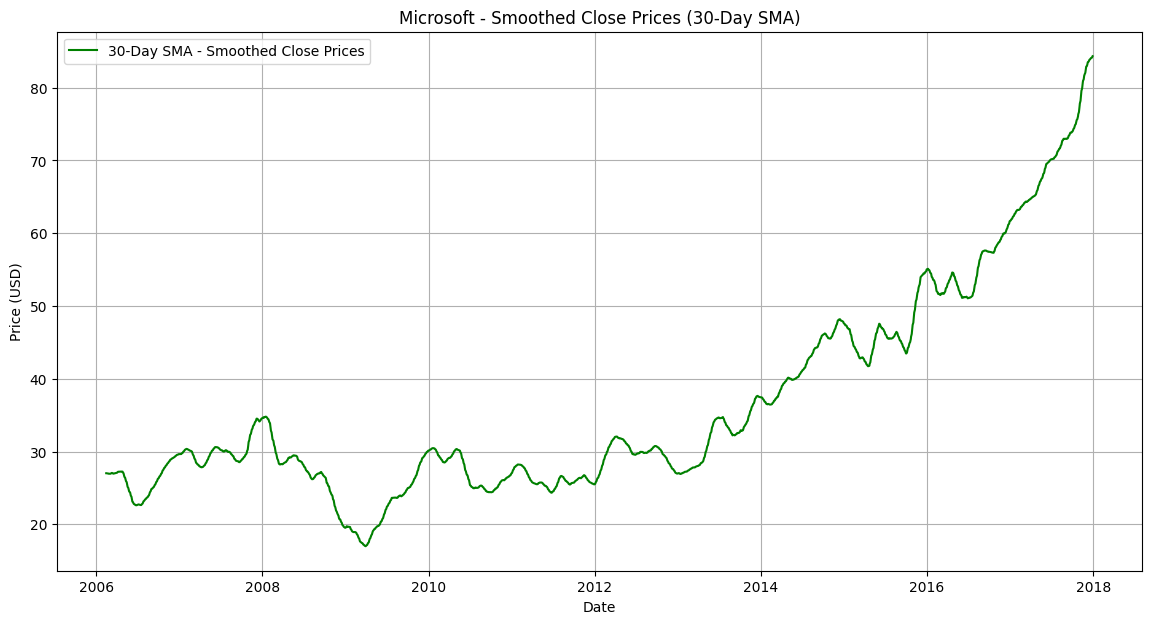

In [4]:
# Calculating a simple moving average for smoothing (30 day window)
data['SMA_30'] = data['Close'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['SMA_30'], label='30-Day SMA - Smoothed Close Prices', color='green')
plt.title('Microsoft - Smoothed Close Prices (30-Day SMA)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

Plotting the 30 Day Trend Line Using Linear Regression

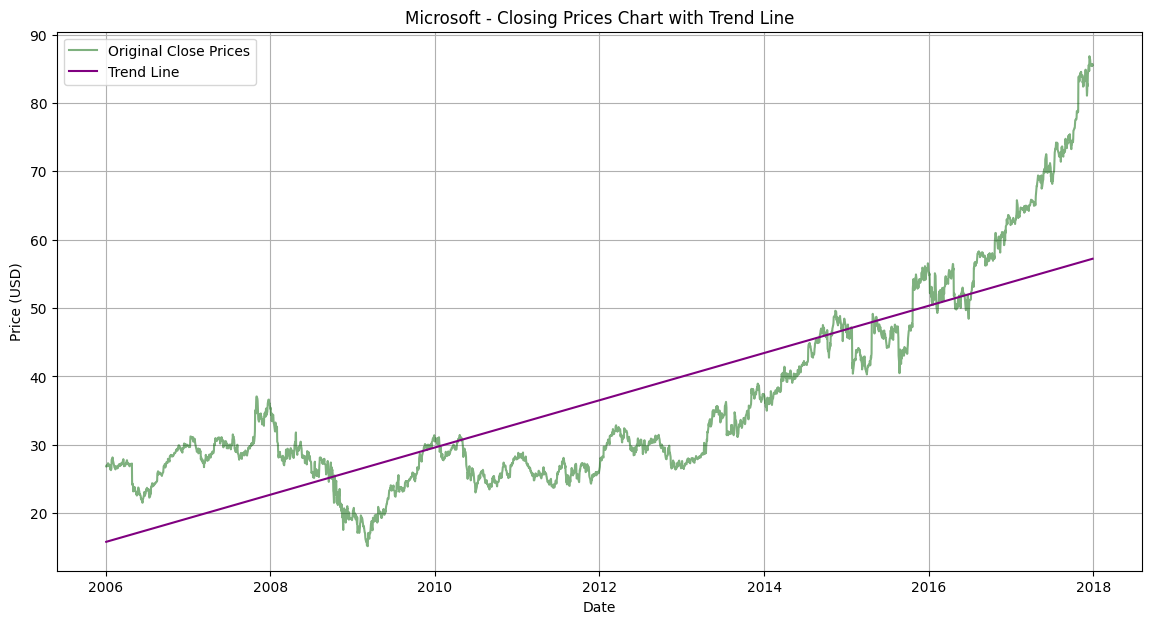

In [5]:
# Convert dates to ordinal for regression purposes
data['Date_ordinal'] = data['Date'].apply(lambda x: x.toordinal())

# Linear Regression to find trend
regressor = LinearRegression()
regressor.fit(data[['Date_ordinal']], data['Close'])

# Predicting values
data['Trend_Line'] = regressor.predict(data[['Date_ordinal']])

# Plotting Trend Line
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Original Close Prices', color='darkgreen', alpha=0.5)
plt.plot(data['Date'], data['Trend_Line'], label='Trend Line', color='purple')
plt.title('Microsoft - Closing Prices Chart with Trend Line')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

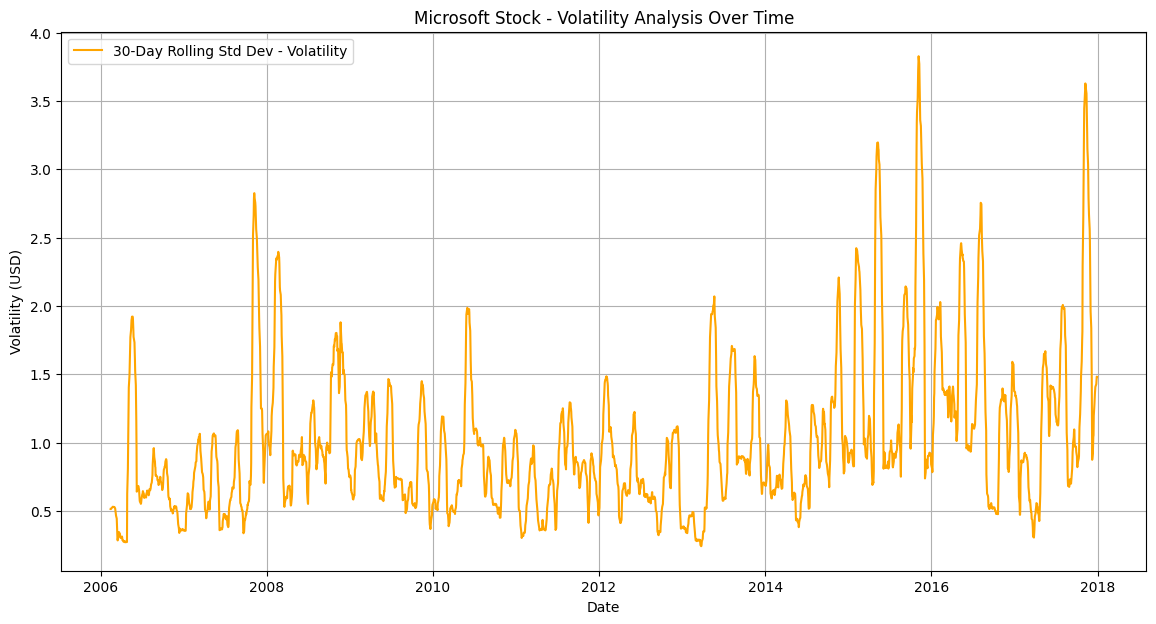

In [6]:
# Calculating the volatility (30-day rolling standard deviation)
data['Volatility'] = data['Close'].rolling(window=30).std()

# Plotting Volatility
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Volatility'], label='30-Day Rolling Std Dev - Volatility', color='orange')
plt.title('Microsoft Stock - Volatility Analysis Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (USD)')
plt.legend()
plt.grid(True)
plt.show()


To answer the question of whether using linear regression on a window of fixed size is sufficient to predict directional accuracy, you will need to conduct a more focused analysis on the directionality of the stock price movements, rather than solely on the numerical prediction accuracy. Directional accuracy refers to the model's ability to correctly predict the direction of price movement (up or down), regardless of the exact numerical value.

Steps to Assess Directional Accuracy:

Determine Predicted Direction:

For each prediction, determine if the model predicts an increase or decrease in stock prices compared to the previous closing price in the window.

Determine Actual Direction:

Similarly, determine the actual direction of the stock price movement in the prediction window.

Compare Directions:

Compare the predicted direction to the actual direction. If both are the same (both up or both down), then the prediction for that period is correct in terms of direction.

Calculate Directional Accuracy:

Directional accuracy can be quantified by calculating the percentage of times the model correctly predicts the direction of the market movement.

Statistical Testing:

Use statistical tests to evaluate the significance of the directional accuracy compared to random chance. A simple binomial test can be used here, assuming a null hypothesis that the model is no better than flipping a coin (50% accuracy).

Directional Accuracy: 0.54


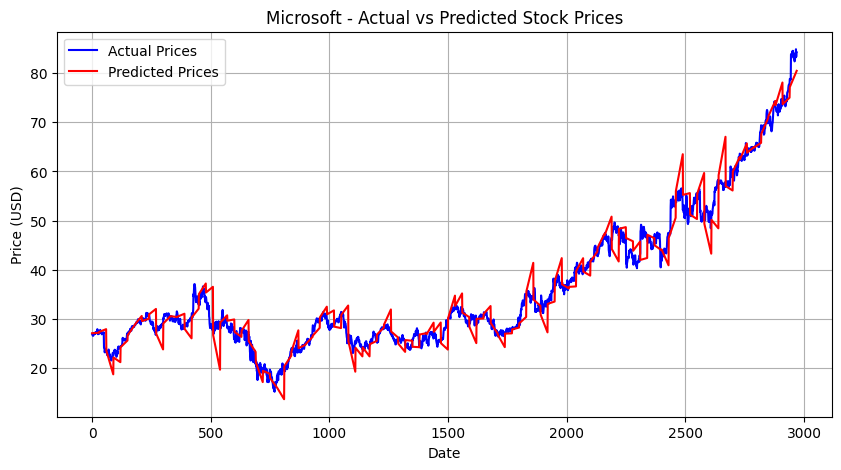

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Load data
data['Date'] = pd.to_datetime(data['Date'])
data.sort_values('Date', inplace=True)

# Set window size
window_size = 30
prediction_window = 30

# Store predictions, actuals, and directions
predictions = []
actuals = []
predicted_directions = []
actual_directions = []

for start in range(0, len(data) - window_size, prediction_window):
    end = start + window_size
    if end + prediction_window > len(data):
        break

    # Fit model on current window
    regressor = LinearRegression()
    regressor.fit(np.array(range(window_size)).reshape(-1, 1), data['Close'][start:end])

    # Predict next values
    previous_price = data['Close'][end - 1]  # Last price in the training set
    predicted = regressor.predict(np.array(range(window_size, window_size + prediction_window)).reshape(-1, 1))
    actual = data['Close'][end:end + prediction_window].values

    predictions.extend(predicted)
    actuals.extend(actual)

    # Determine predicted and actual directions
    predicted_direction = ['up' if p > previous_price else 'down' for p in predicted]
    actual_direction = ['up' if a > previous_price else 'down' for a in actual]

    predicted_directions.extend(predicted_direction)
    actual_directions.extend(actual_direction)

# Calculate directional accuracy
directional_accuracy = np.mean(np.array(predicted_directions) == np.array(actual_directions))
print(f"Directional Accuracy: {directional_accuracy:.2f}")

# Plot predictions vs actuals for visual inspection
plt.figure(figsize=(10, 5))
plt.plot(actuals, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red')
plt.title('Microsoft - Actual vs Predicted Stock Prices')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()


A directional accuracy of 54% on the Microsoft stock suggests that the linear regression model using a fixed window size is only slightly better than random guessing (50/50 coin toss) in predicting the direction of stock price movements. 

In practical terms, this level of accuracy may not be sufficiently reliable for most trading or investment strategies, especially if high stakes are involved. 